In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
df = pd.read_csv("house_price.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [64]:
df.shape

(1460, 81)

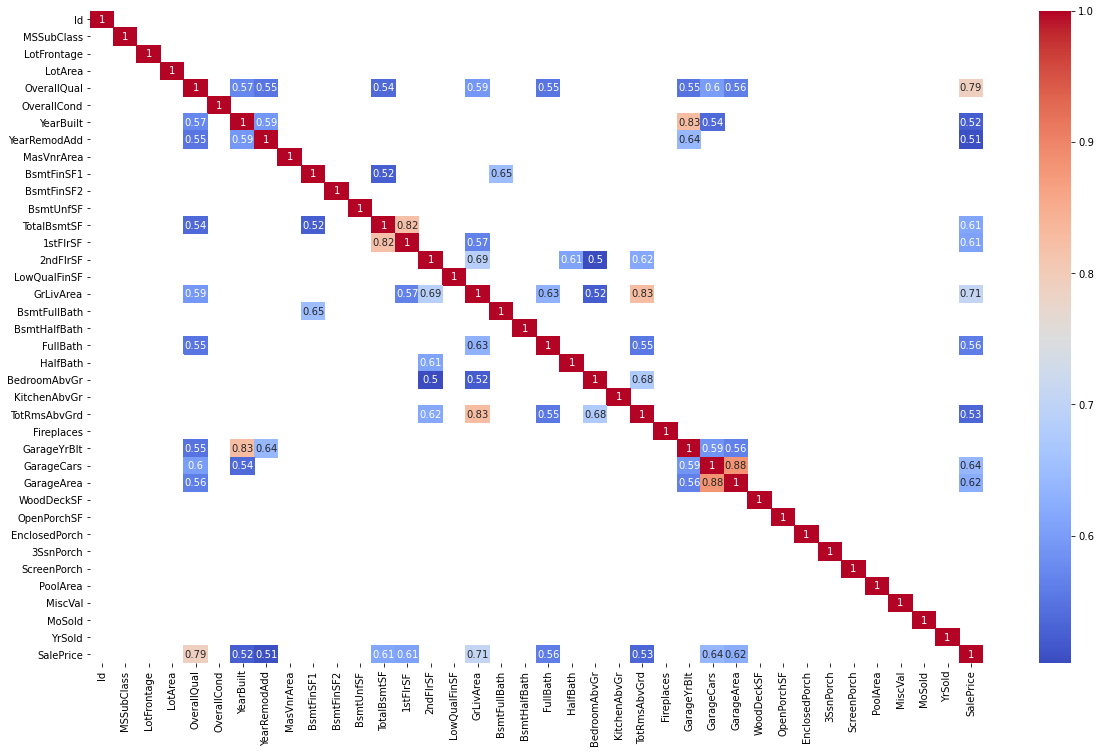

In [65]:
#filter numeric column only
data_num = df[numerical_var]

#calculating correlation among numeric variable
corr_matrix = data_num.corr()

#filter correlation values above 0.5
filter_corr = corr_matrix[corr_matrix > 0.5]

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,
            cmap="coolwarm",
            annot=True);

In [9]:
df.isna().sum().sort_values(ascending=False).head(60)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [10]:
#PoolQc
df["PoolQC"] = df["PoolQC"].fillna("None")

In [11]:
#MiscFeature
df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [12]:
#Alley
df["Alley"] = df["Alley"].fillna("None")

In [13]:
#Fence
df["fence"] = df["Fence"].fillna("None")

In [14]:
#FireplaceQu
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [15]:
#LotFrontage
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [16]:
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for i in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    df[i] = df[i].fillna("None")

In [17]:
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = No cars in such garage)
for i in ("GarageYrBlt", "GarageArea", "GarageCars"):
    df[i] = df[i].fillna(0)

In [18]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for i in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
    df[i] = df[i].fillna("None")

In [19]:
#MasVnrArea and MasVnType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrType"].fillna(0)

In [20]:
#MSZoning(The general zoning classification) : "RL" is by far the most common value. So we can fill in missing values with "RL"
df["MSZoning"] = df["MSZoning"].fillna(df["MSZoning"].mode()[0])

In [21]:
df["Functional"] = df["Functional"].fillna("Typ")

In [22]:
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

In [23]:
df["KitchenQual"] = df["KitchenQual"].fillna(df["KitchenQual"].mode()[0])

In [24]:
df["Exterior1st"] = df["Exterior1st"].fillna(df["Exterior1st"].mode()[0])
df["Exterior2nd"] = df["Exterior2nd"].fillna(df["Exterior2nd"].mode()[0])

In [25]:
df["SaleType"] = df["SaleType"].fillna(df["SaleType"].mode()[0])

In [26]:
df["MSSubClass"] = df["MSSubClass"].fillna("None")

In [27]:
categorical_var = df.dtypes[df.dtypes == "object"]

In [28]:
#Transforming Some numerical variables that are really categorical
df["OverallCond"].dtype

dtype('int64')

In [29]:
##Changing OverallCond into a categorical variable
df["OverallCond"] = df["OverallCond"].astype(str)

##MSSubClass = The building class
df["MSSubClass"] = df["MSSubClass"].apply(str)

#Year and month sold are transformed into categorical features.
df["YrSold"] = df["YrSold"].astype(str)
df["MoSold"] = df["MoSold"].astype(str)

In [31]:
df.drop(['Utilities'],axis=1,inplace = True)

In [59]:
# Plot bar plot for each categorical feature

for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [33]:
#Process columns, apply LabelEncoder to categorical features
for c in cols:
    label_ec = LabelEncoder()
    label_ec.fit(list(df[c].values))
    df[c] = label_ec.transform(list(df[c].values))

In [34]:
df = pd.get_dummies(df)
print(df.shape)

(1460, 230)


In [35]:
X = df.drop("SalePrice", axis=1)

In [36]:
from sklearn.preprocessing import StandardScaler
import numpy as np

#Standardized the dataset
sc_X= StandardScaler()
X_std = sc_X.fit_transform(X)

### PRINCIPAL COMPONENT ANALYSIS

In [38]:
#1. Computing the mean vector
import numpy as np
mean_vec = np.mean(X_std, axis = 0)

In [39]:
#2. Computing the Covariance Matrix
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec))/ (X_std.shape[0]-1)

In [40]:
print(cov_mat)

[[ 1.0006854   0.01992535 -0.00338295 ... -0.02160409  0.00267991
   0.00667633]
 [ 0.01992535  1.0006854   0.23801249 ...  0.04081362  0.01486244
  -0.0779224 ]
 [-0.00338295  0.23801249  1.0006854  ...  0.0048497  -0.0018367
  -0.03100398]
 ...
 [-0.02160409  0.04081362  0.0048497  ...  1.0006854  -0.03026477
  -0.71150659]
 [ 0.00267991  0.01486244 -0.0018367  ... -0.03026477  1.0006854
  -0.1785926 ]
 [ 0.00667633 -0.0779224  -0.03100398 ... -0.71150659 -0.1785926
   1.0006854 ]]


In [41]:
#3. Computing eigenvectors and corresponding eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [42]:
print(eig_vecs)

[[-9.17856379e-04+0.00000000e+00j -1.24882294e-03+0.00000000e+00j
  -3.11131613e-03+0.00000000e+00j ...  3.63380685e-17-4.05705827e-17j
   3.63380685e-17+4.05705827e-17j  2.05074310e-16+0.00000000e+00j]
 [-2.29183987e-02+0.00000000e+00j  3.18703150e-02+0.00000000e+00j
  -2.52766602e-01+0.00000000e+00j ...  6.43360319e-16-1.12507412e-16j
   6.43360319e-16+1.12507412e-16j  1.95520065e-15+0.00000000e+00j]
 [ 8.10062083e-02+0.00000000e+00j -8.40341039e-02+0.00000000e+00j
  -1.85091166e-01+0.00000000e+00j ... -3.42548666e-16+3.47623476e-17j
  -3.42548666e-16-3.47623476e-17j -8.62777930e-16+0.00000000e+00j]
 ...
 [-5.86509052e-02+0.00000000e+00j -7.04276675e-02+0.00000000e+00j
  -2.23056750e-02+0.00000000e+00j ...  1.11127384e-02+2.16115347e-03j
   1.11127384e-02-2.16115347e-03j -4.89645533e-02+0.00000000e+00j]
 [-1.60999385e-02+0.00000000e+00j -2.31280269e-02+0.00000000e+00j
   5.46989922e-03+0.00000000e+00j ... -3.39025965e-03-1.70736942e-04j
  -3.39025965e-03+1.70736942e-04j -1.38647574e-

In [43]:
print(eig_vals)

[ 1.48104586e+01+0.00000000e+00j  7.24266808e+00+0.00000000e+00j
  6.23687284e+00+0.00000000e+00j  5.23636512e+00+0.00000000e+00j
  4.00179519e+00+0.00000000e+00j  3.95022252e+00+0.00000000e+00j
  3.75805049e+00+0.00000000e+00j  3.41623854e+00+0.00000000e+00j
  3.35409530e+00+0.00000000e+00j  3.17338064e+00+0.00000000e+00j
  2.98522832e+00+0.00000000e+00j  2.82183989e+00+0.00000000e+00j
  2.73619455e+00+0.00000000e+00j  2.64838958e+00+0.00000000e+00j
  2.57700063e+00+0.00000000e+00j  2.47416361e+00+0.00000000e+00j
  2.39208730e+00+0.00000000e+00j  2.38091795e+00+0.00000000e+00j
  2.34191651e+00+0.00000000e+00j  2.23653347e+00+0.00000000e+00j
  2.19686069e+00+0.00000000e+00j  2.17359399e+00+0.00000000e+00j
  2.13010426e+00+0.00000000e+00j  2.11705845e+00+0.00000000e+00j
  2.08764623e+00+0.00000000e+00j  2.04849947e+00+0.00000000e+00j
  2.00782724e+00+0.00000000e+00j  1.99904615e+00+0.00000000e+00j
  1.92347836e+00+0.00000000e+00j  1.90333427e+00+0.00000000e+00j
  1.88226422e+00+0.000000

In [44]:
#4.Sorting the eigenvectors by decreasing eigenvalues
# Make a list of (eigenvalue, eigenvectors) tuples
eig_pairs = [[np.abs(eig_vals[i]), eig_vecs[:,i]] for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print("Eigenvalues in descending order:")
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
14.810458551570681
7.24266808448427
6.236872843651732
5.236365122826524
4.001795194279794
3.9502225162730675
3.758050488149182
3.4162385355466713
3.354095301551684
3.173380641707133
2.985228315329123
2.8218398861169343
2.7361945548772044
2.6483895770329493
2.5770006316445553
2.4741636080382
2.3920873023182296
2.3809179476275215
2.3419165077805837
2.2365334670287402
2.1968606899090037
2.173593987823789
2.1301042602891425
2.1170584542475503
2.087646228478544
2.048499472720004
2.0078272368817363
1.9990461509071178
1.923478355790843
1.903334272078957
1.88226422162846
1.8762127658381194
1.8174002445872568
1.7965042371619802
1.7758347615759635
1.7310288667688765
1.682884870326368
1.664478338509953
1.609080799735277
1.5957976256545015
1.548282657570329
1.5326968463001986
1.5127572535731562
1.5035742375149443
1.4815231126370876
1.4624848445414813
1.4428797317069435
1.4301777489241734
1.4094960010329634
1.4051656718101213
1.3819721314865872
1.3639045429624113
1.

In [45]:
#5. Select components based on eigen values
pairs = np.array(eig_pairs)
count = 0
components = []

for i in range(len(eig_pairs)):
    if eig_pairs[i][0]>0.5:
        count += 1
        components.append(pairs[i])
        
print("Number of components:" + str(count))   

Number of components:141


In [46]:
#Calculate Explained Variance
total = 0
ein = []
for i in range(len(components)):
    total += components[i][0]
    ein.append(components[i][0])
    
#divide eigen value by total eigen value and then multiple with 100 for the selected components     
var_exp = [(i/ sum(eig_vals))*100 for i in sorted(ein, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [47]:
cum_var_exp

array([ 6.46301939+0.j,  9.62359029+0.j, 12.34525012+0.j, 14.63030626+0.j,
       16.37661816+0.j, 18.10042466+0.j, 19.74037072+0.j, 21.23115615+0.j,
       22.69482339+0.j, 24.07962998+0.j, 25.38233026+0.j, 26.61373075+0.j,
       27.80775715+0.j, 28.96346702+0.j, 30.08802403+0.j, 31.16770481+0.j,
       32.21156895+0.j, 33.25055899+0.j, 34.27252949+0.j, 35.24851272+0.j,
       36.20718346+0.j, 37.15570103+0.j, 38.08524045+0.j, 39.00908692+0.j,
       39.92009842+0.j, 40.81402697+0.j, 41.69020689+0.j, 42.5625549 +0.j,
       43.40192648+0.j, 44.23250753+0.j, 45.053894  +0.j, 45.87263971+0.j,
       46.66572069+0.j, 47.44968303+0.j, 48.22462558+0.j, 48.98001564+0.j,
       49.71439651+0.j, 50.44074511+0.j, 51.14291921+0.j, 51.83929677+0.j,
       52.51493965+0.j, 53.18378116+0.j, 53.84392138+0.j, 54.50005431+0.j,
       55.14656451+0.j, 55.78476676+0.j, 56.41441368+0.j, 57.03851769+0.j,
       57.65359655+0.j, 58.26678573+0.j, 58.86985367+0.j, 59.46503723+0.j,
       60.05040982+0.j, 6

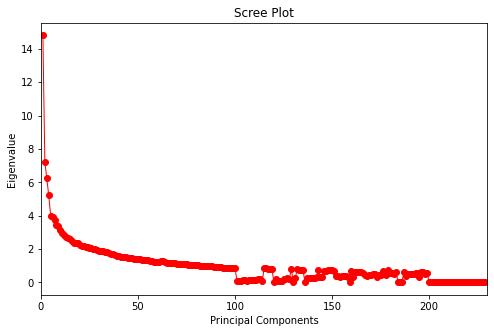

In [48]:
#Make a random array and then make it positive-definite
num_vars = len(eig_vals)
num_obs = 9

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1 
plt.plot(sing_vals, eig_vals, "ro-", linewidth=1)

plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalue")
plt.xlim(0,230)
plt.show()

#### Scree Plot shows eigen value for each components. starting components has high value and in middle, some component has higher than others.

#### The following plot to shows percentage of variance explained by each of the selected components.

In [49]:
#Calculate Explained Variance
total = sum(eig_vals)

#Divide eigen value by total eigen value and then multiple with 100 for the selected components
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

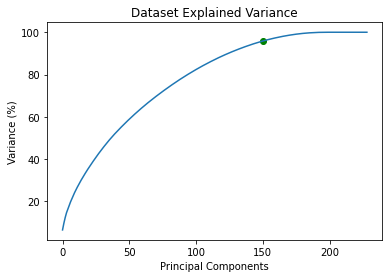

In [50]:
plt.figure()
plt.scatter([150], [cum_var_exp[150]], color='g')
plt.plot(cum_var_exp)
plt.xlabel("Principal Components")
plt.ylabel("Variance (%)") #for each components
plt.title("Dataset Explained Variance")
plt.show()

#### From the above plot, we can observe that the variance remains constant after the number of components reaches 150

In [51]:
cum_var_exp[150]

(95.8422191021751+0j)

#### From the above result, We can see that the selected 150 components has 96% information. Here we lose 4% information. We have to select less component than original variable, at the same time, the selected component must contain as much as information.

In [52]:
#7. Deriving the new Data Set
#Finally, We select only 150 components. Filter out eigen vector of the selected components.
N = 229
M = 150

a = np.ndarray(shape = (N, 0))
for i in range(M):
    b = eig_pairs[i][1].reshape(N,1)
    a = np.hstack((a,b))

In [53]:
#matrix calculation of original dataset with eigen vector of the selected components.
a

array([[-0.00091786+0.j, -0.00124882+0.j, -0.00311132+0.j, ...,
         0.04737578+0.j,  0.01984383+0.j, -0.03907232+0.j],
       [-0.0229184 +0.j,  0.03187032+0.j, -0.2527666 +0.j, ...,
        -0.10177794+0.j,  0.00084618+0.j, -0.0109117 +0.j],
       [ 0.08100621+0.j, -0.0840341 +0.j, -0.18509117+0.j, ...,
        -0.00117074+0.j,  0.03951735+0.j,  0.12363688+0.j],
       ...,
       [-0.05865091+0.j, -0.07042767+0.j, -0.02230567+0.j, ...,
         0.01029324+0.j,  0.01732139+0.j,  0.04205054+0.j],
       [-0.01609994+0.j, -0.02312803+0.j,  0.0054699 +0.j, ...,
         0.01144344+0.j,  0.00333548+0.j,  0.02706349+0.j],
       [ 0.07349467+0.j,  0.1117102 +0.j,  0.04853134+0.j, ...,
        -0.00741008+0.j, -0.00965227+0.j, -0.0232443 +0.j]])

In [55]:
# Projection onto the new feature space
Y = X_std.dot(a)

In [56]:
Y

array([[ 3.37881956+0.j,  0.83126798+0.j,  0.14126206+0.j, ...,
        -0.05264885+0.j,  0.11488625+0.j,  0.0546108 +0.j],
       [-0.49014982+0.j, -2.54440034+0.j,  0.55360824+0.j, ...,
         1.50686946+0.j, -0.13730069+0.j, -0.49557642+0.j],
       [ 3.70006074+0.j,  0.46216915+0.j, -0.10774618+0.j, ...,
         0.26513806+0.j,  0.21907631+0.j,  0.12865672+0.j],
       ...,
       [-0.19576961+0.j,  1.05012274+0.j, -3.96173083+0.j, ...,
         0.30930739+0.j, -0.54681933+0.j,  0.34200916+0.j],
       [-3.03068159+0.j, -2.58873065+0.j,  1.93282496+0.j, ...,
        -0.67055862+0.j, -0.09255241+0.j,  0.70546917+0.j],
       [-0.99253283+0.j, -3.15321751+0.j,  1.10195506+0.j, ...,
        -0.9994003 +0.j, -0.12780606+0.j, -0.40775836+0.j]])

In [57]:
Y.shape

(1460, 150)

### We reduced the number of columns from 221 to 150.